In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("Netflix Dataset csv.xlsx")

print(df.head())


  Show_Id Category     Title           Director  \
0      s1  TV Show      0.03                NaN   
1      s2    Movie  07:19:00  Jorge Michel Grau   
2      s3    Movie  23:59:00       Gilbert Chan   
3      s4    Movie         9        Shane Acker   
4      s5    Movie        21     Robert Luketic   

                                                Cast        Country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

             

In [3]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [4]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [5]:
df["Release_Date"].mode()

0    January 1, 2020
Name: Release_Date, dtype: object

In [11]:
df['Director'] = df['Director'].fillna('Nan')
df['Cast'] = df['Cast'].fillna("Nan")
df['Country'] = df['Country'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Not Rated')
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Date'] = df['Release_Date'].fillna(df['Release_Date'].mode()[0])




In [12]:
df['Release_Year'] = df['Release_Date'].dt.year


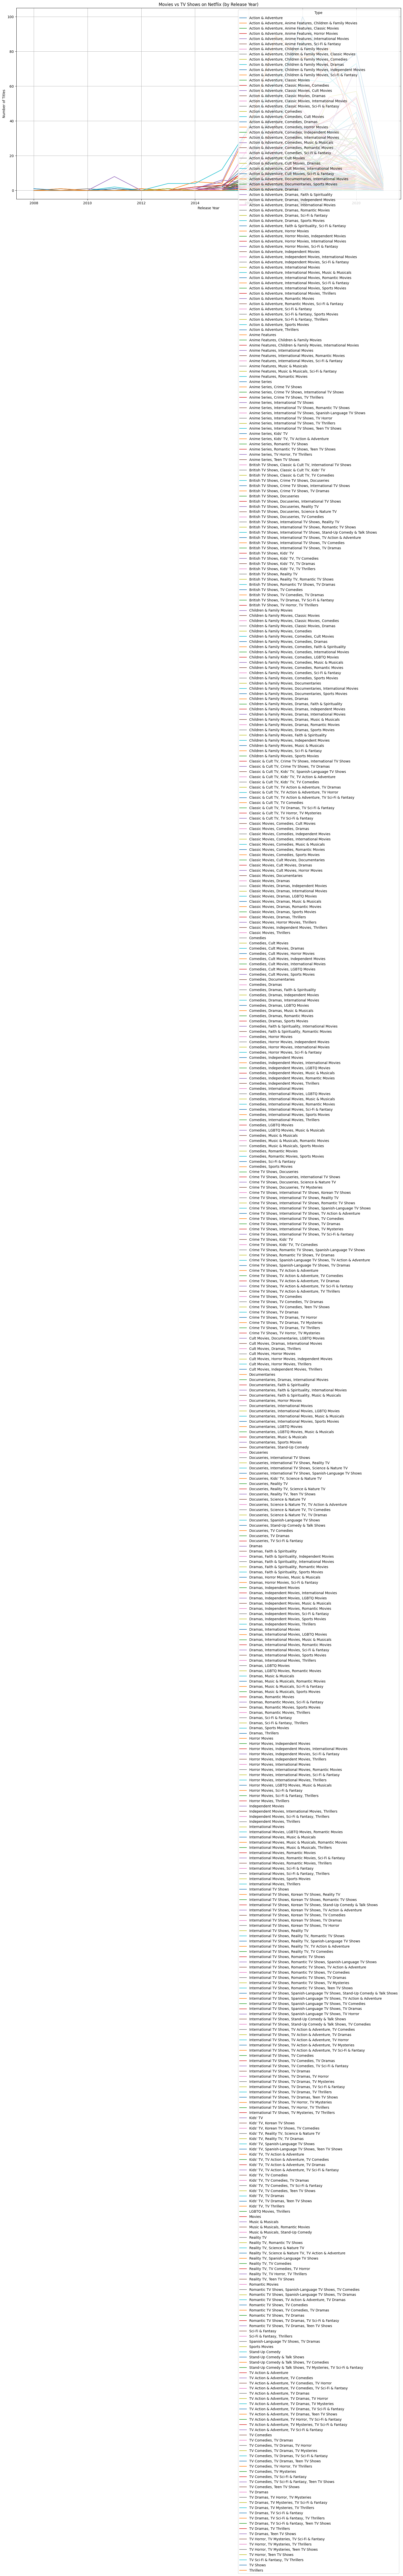

In [13]:
#Analyze the distribution of Movies vs TV Shows over the years

df.columns = df.columns.str.strip()

# Count of Movies and TV Shows by release yea
movie_tv_count = df.groupby(['Release_Year', 'Type']).size().unstack(fill_value=0)

# Plot
movie_tv_count.plot(kind='line', figsize=(20,10))
plt.title("Movies vs TV Shows on Netflix (by Release Year)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


Top 10 Content Types:
 Type
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: count, dtype: int64


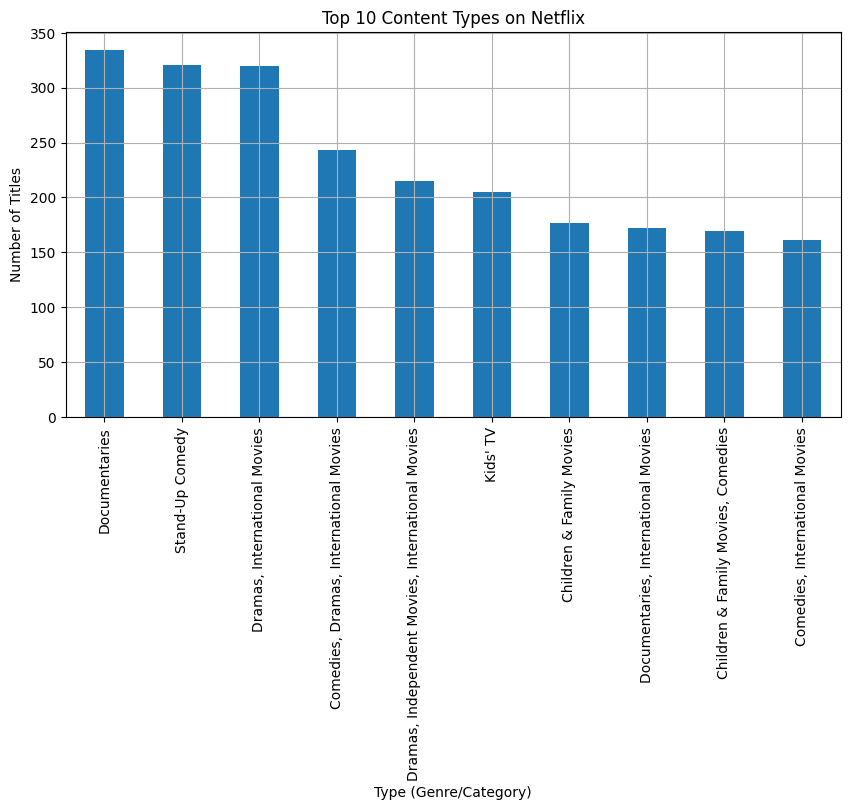

In [ ]:
#Identify the most common genres and how their popularity changed
# Count top 10 types (genres/categories)
top_types = df['Type'].value_counts().head(10)
print("Top 10 Content Types:\n", top_types)

# Plot
top_types.plot(kind='bar', figsize=(10,5))

plt.title("Top 10 Content Types on Netflix")
plt.xlabel("Type (Genre/Category)")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


Top 10 Countries:
 Country_list
United States     3298
India              990
United Kingdom     723
Unknown            507
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Name: count, dtype: int64


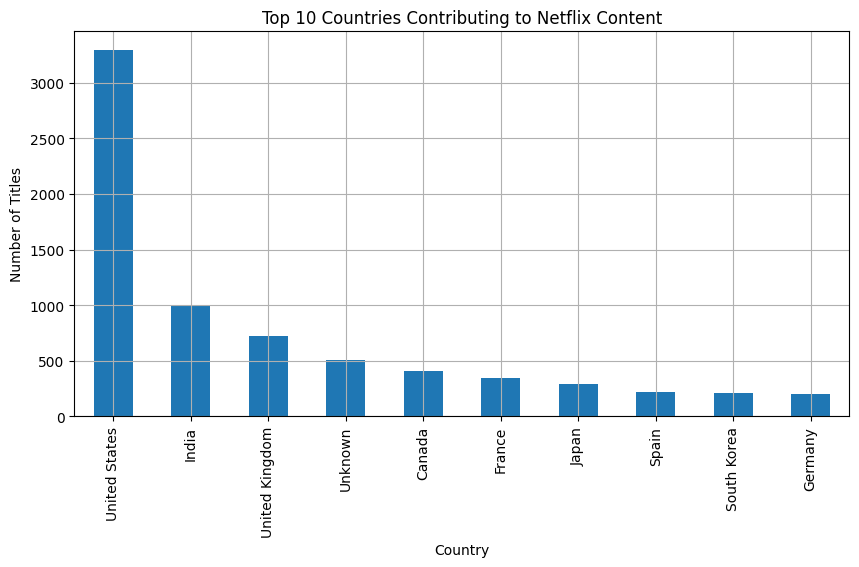

In [ ]:
# Split countries if multiple are listed
df['Country'] = df['Country'].astype(str)
df['Country_list'] = df['Country'].apply(lambda x: [c.strip() for c in x.split(',')])
country_df = df.explode('Country_list')

# Top 10 countries
top_countries = country_df['Country_list'].value_counts().head(10)
print("Top 10 Countries:\n", top_countries)

# Plot
top_countries.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


In [10]:
df["Release_Date"]

0       2020-08-14 00:00:00
1       2016-12-23 00:00:00
2       2018-12-20 00:00:00
3       2017-11-16 00:00:00
4       2020-01-01 00:00:00
               ...         
7784    2020-10-19 00:00:00
7785    2019-03-02 00:00:00
7786    2020-09-25 00:00:00
7787    2020-10-31 00:00:00
7788    2020-03-01 00:00:00
Name: Release_Date, Length: 7789, dtype: object